<a href="https://colab.research.google.com/github/lucaCosca/JetNet_ML-Final-Project/blob/main/Control_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Base Neural Network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

import gdown

### Load the Dataset


In [ ]:
url1 = "https://drive.google.com/uc?id=1P4SYbafssKz-6oPXjqTD7aBiCawQjHEk"
output1 = "Y_N70000_lpx50_gqtwz.npz"

url2 = "https://drive.google.com/uc?id=1S_QInod3zyO8Vj-YGQfuM1eVPnwiIeRX"
output2 = "X_N70000_lpx50_gqtwz.npz"

gdown.download(url1, output1, quiet=False)
gdown.download(url2, output2, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1P4SYbafssKz-6oPXjqTD7aBiCawQjHEk
To: /content/Y_N70000_lpx50_gqtwz.npz
100%|██████████| 1.12M/1.12M [00:00<00:00, 70.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1S_QInod3zyO8Vj-YGQfuM1eVPnwiIeRX
From (redirected): https://drive.google.com/uc?id=1S_QInod3zyO8Vj-YGQfuM1eVPnwiIeRX&confirm=t&uuid=0b7451b2-9973-4026-9cf8-736396c05c20
To: /content/X_N70000_lpx50_gqtwz.npz
100%|██████████| 1.40G/1.40G [00:20<00:00, 69.5MB/s]


'X_N70000_lpx50_gqtwz.npz'

In [ ]:
X_Data = np.load("X_N70000_lpx50_gqtwz.npz")["arr_0"]
Y_Data = np.load("Y_N70000_lpx50_gqtwz.npz")["arr_0"][:,0] # took only the feature about the class of the particle, it cuts the mass

## Data Preprocessing

g = [1. , 0. ,0. ,0. , 0.]  
q = [0. , 1. ,0. ,0. , 0.]   
t = [0. , 0. ,1. ,0. , 0.]   
w = [0. , 0. ,0. ,1. , 0.]   
z = [0. , 0. ,0. ,0. , 1.]   

In [ ]:
# data split
num_images = X_Data.shape[0]

train_end = int(0.6 * num_images)
test_end = train_end + int(0.2 * num_images)

X_Data = X_Data.reshape(num_images, 50, 50, 1)

X_train, X_test, X_val = X_Data[:train_end], X_Data[train_end:test_end], X_Data[test_end:]
Y_train, Y_test, Y_val = Y_Data[:train_end], Y_Data[train_end:test_end], Y_Data[test_end:]

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
Y_train_onehot = one_hot_encoder.fit_transform(Y_train.reshape((-1,1)))
Y_valid_onehot = one_hot_encoder.fit_transform(Y_val.reshape((-1,1)))
Y_test_onehot = one_hot_encoder.fit_transform(Y_test.reshape((-1,1)))

# The data is alredy normalized


In [ ]:
X_train.shape

(42000, 50, 50, 1)

## Neural Network Model

In [ ]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [50,50]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
])

In [ ]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │       1,250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,175,717 (15.93 MB)

 Trainable params: 1,391,905 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,783,812 (10.62 MB)

In [ ]:
model0.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy'],
)

history = model0.fit(
    X_train, Y_train_onehot,
    batch_size = 32,
    epochs = 10,
    validation_data = (X_val, Y_valid_onehot)
)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4649 - loss: 1.2581 - val_accuracy: 0.6021 - val_loss: 1.0398
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6158 - loss: 0.9989 - val_accuracy: 0.6378 - val_loss: 0.9765
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6643 - loss: 0.9066 - val_accuracy: 0.6496 - val_loss: 0.9512
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6901 - loss: 0.8400 - val_accuracy: 0.6525 - val_loss: 0.9514
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7168 - loss: 0.7821 - val_accuracy: 0.6366 - val_loss: 1.0036
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7430 - loss: 0.7189 - val_accuracy: 0.6514 - val_loss: 1.0095
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7688 - loss: 0.6492 - val_accuracy: 0.6389 - val_loss: 1.1002
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7855 - loss: 0.5977 - 

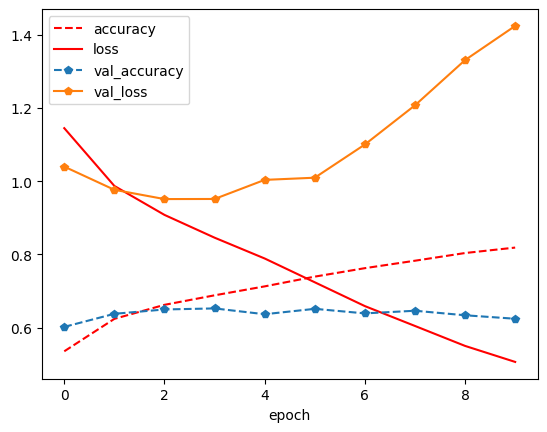

In [ ]:
h = pd.DataFrame(history.history)
h.plot(xlabel = "epoch", style = ["r--","r-","p--","p-"])
plt.show()